In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
O3 = pd.read_csv('O3trim.csv')

In [6]:
O3

,Date,State,County,City,Mean,1st Max Value,1st Max Hour,O3 AQI
0,2000-02-29,Alabama,Baldwin,Fairhope,0.023000,0.023,23,21
1,2000-03-01,Alabama,Baldwin,Fairhope,0.036471,0.046,11,43
2,2000-03-02,Alabama,Baldwin,Fairhope,0.037765,0.062,11,74
3,2000-03-03,Alabama,Baldwin,Fairhope,0.034941,0.037,10,34
4,2000-03-04,Alabama,Baldwin,Fairhope,0.028882,0.038,11,35
...,...,...,...,...,...,...,...,...
8020868,2021-06-26,Wyoming,Weston,Not in a city,0.036647,0.044,7,41
8020869,2021-06-27,Wyoming,Weston,Not in a city,0.041176,0.043,9,40
8020870,2021-06-28,Wyoming,Weston,Not in a city,0.042941,0.044,8,41
8020871,2021-06-29,Wyoming,Weston,Not in a city,0.051118,0.052,10,48


In [8]:
O3['Date'] = pd.to_datetime(O3['Date'])
df = O3.copy()

In [9]:
df

,Date,State,County,City,Mean,1st Max Value,1st Max Hour,O3 AQI
0,2000-02-29,Alabama,Baldwin,Fairhope,0.023000,0.023,23,21
1,2000-03-01,Alabama,Baldwin,Fairhope,0.036471,0.046,11,43
2,2000-03-02,Alabama,Baldwin,Fairhope,0.037765,0.062,11,74
3,2000-03-03,Alabama,Baldwin,Fairhope,0.034941,0.037,10,34
4,2000-03-04,Alabama,Baldwin,Fairhope,0.028882,0.038,11,35
...,...,...,...,...,...,...,...,...
8020868,2021-06-26,Wyoming,Weston,Not in a city,0.036647,0.044,7,41
8020869,2021-06-27,Wyoming,Weston,Not in a city,0.041176,0.043,9,40
8020870,2021-06-28,Wyoming,Weston,Not in a city,0.042941,0.044,8,41
8020871,2021-06-29,Wyoming,Weston,Not in a city,0.051118,0.052,10,48


In [10]:
df.set_index('Date', inplace=True)

In [11]:
df

,State,County,City,Mean,1st Max Value,1st Max Hour,O3 AQI
Date,,,,,,,
2000-02-29,Alabama,Baldwin,Fairhope,0.023000,0.023,23,21
2000-03-01,Alabama,Baldwin,Fairhope,0.036471,0.046,11,43
2000-03-02,Alabama,Baldwin,Fairhope,0.037765,0.062,11,74
2000-03-03,Alabama,Baldwin,Fairhope,0.034941,0.037,10,34
2000-03-04,Alabama,Baldwin,Fairhope,0.028882,0.038,11,35
...,...,...,...,...,...,...,...
2021-06-26,Wyoming,Weston,Not in a city,0.036647,0.044,7,41
2021-06-27,Wyoming,Weston,Not in a city,0.041176,0.043,9,40
2021-06-28,Wyoming,Weston,Not in a city,0.042941,0.044,8,41


In [23]:
df.describe().apply(lambda x: x.apply('{0:3f}'.format))

,Mean,1st Max Value,1st Max Hour,O3 AQI
count,8020873.000000,8020873.000000,8020873.000000,8020873.000000
mean,0.032110,0.041937,10.802424,42.507463
std,0.012388,0.014386,3.171269,22.650060
min,-0.003444,-0.003000,7.000000,0.000000
25%,0.023353,0.032000,9.000000,30.000000
50%,0.031765,0.041000,10.000000,38.000000
75%,0.040235,0.051000,11.000000,47.000000
max,0.135529,0.183000,23.000000,282.000000


In [12]:
date_aqi = df[['O3 AQI']]
date_aqi

,O3 AQI
Date,
2000-02-29,21
2000-03-01,43
2000-03-02,74
2000-03-03,34
2000-03-04,35
...,...
2021-06-26,41
2021-06-27,40
2021-06-28,41


array([[<AxesSubplot:title={'center':'O3 AQI'}>]], dtype=object)

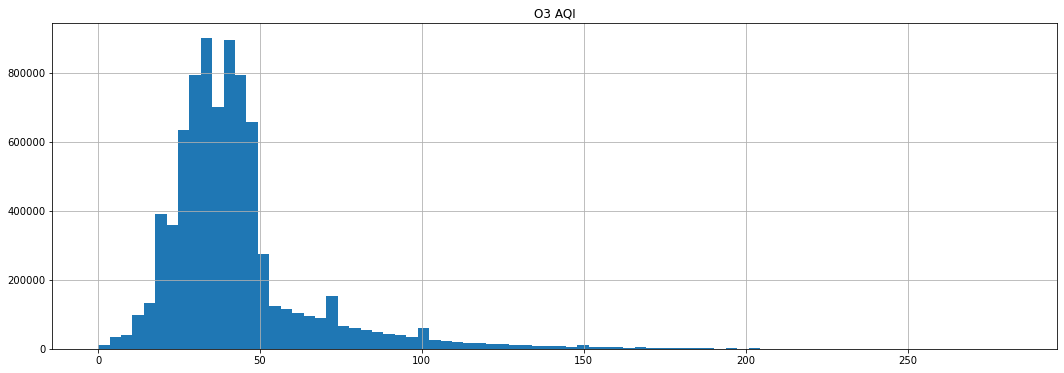

In [13]:
date_aqi.hist(figsize=(18,6), bins=80)

<AxesSubplot:xlabel='Date'>

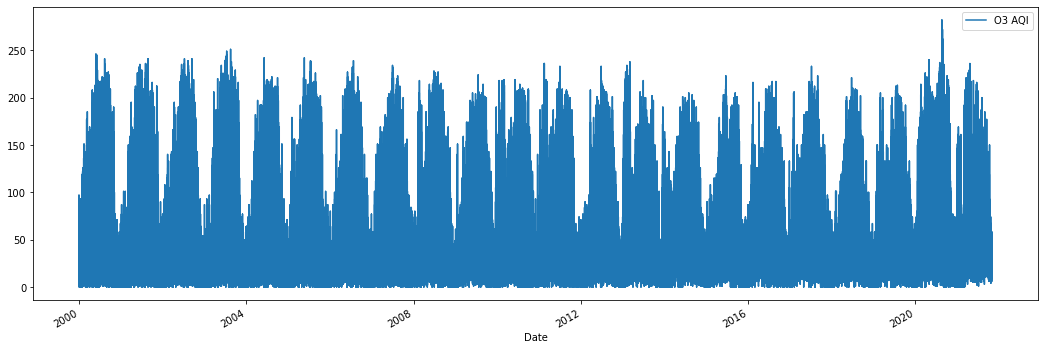

In [14]:
date_aqi.plot(figsize=(18,6))

<AxesSubplot:xlabel='Date'>

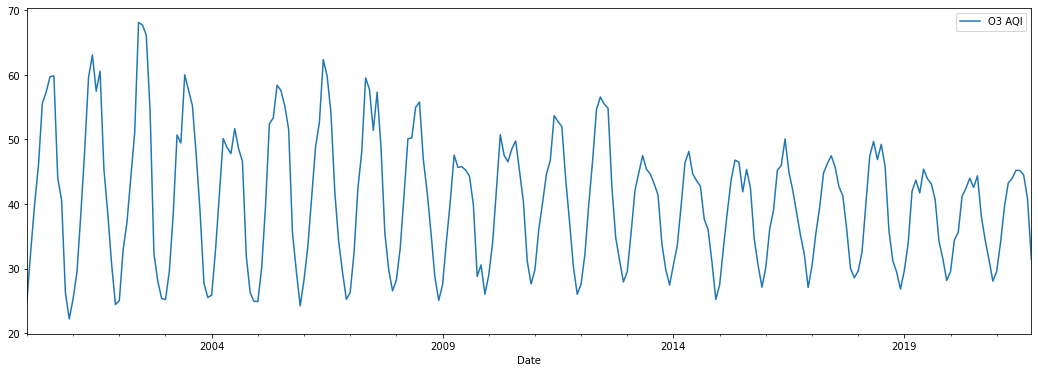

In [15]:
aqi_monthly = date_aqi.resample('MS')
all_monthly = aqi_monthly.mean()
all_monthly.plot(figsize=(18,6))

<AxesSubplot:xlabel='Date'>

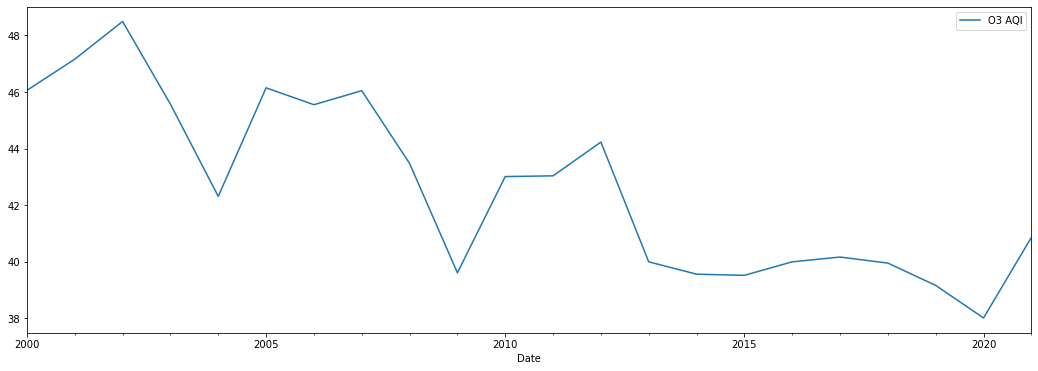

In [16]:
aqi_yearly = date_aqi.resample('YS')
all_yearly = aqi_yearly.mean()
all_yearly.plot(figsize=(18,6))

In [18]:
O3[O3['O3 AQI']>200]

,Date,State,County,City,Mean,1st Max Value,1st Max Hour,O3 AQI
168,2000-08-18,Alabama,Baldwin,Fairhope,0.096588,0.110,15,205
1251,2000-08-17,Alabama,Jefferson,Birmingham,0.055000,0.113,10,208
2536,2000-08-17,Alabama,Jefferson,Pinson,0.064294,0.108,10,203
3028,2000-08-17,Alabama,Jefferson,Tarrant (corporate name for Tarrant City),0.057824,0.111,10,206
4761,2000-08-15,Alabama,Shelby,Helena,0.064412,0.111,10,206
...,...,...,...,...,...,...,...,...
7798890,2021-06-27,California,San Bernardino,Redlands,0.071471,0.112,10,207
7798891,2021-06-28,California,San Bernardino,Redlands,0.068647,0.112,10,207
7799329,2021-06-16,California,San Bernardino,San Bernardino,0.055706,0.107,10,202
7805100,2021-05-21,California,Santa Clara,San Martin,0.093882,0.122,14,218


In [19]:
df

,State,County,City,Mean,1st Max Value,1st Max Hour,O3 AQI
Date,,,,,,,
2000-02-29,Alabama,Baldwin,Fairhope,0.023000,0.023,23,21
2000-03-01,Alabama,Baldwin,Fairhope,0.036471,0.046,11,43
2000-03-02,Alabama,Baldwin,Fairhope,0.037765,0.062,11,74
2000-03-03,Alabama,Baldwin,Fairhope,0.034941,0.037,10,34
2000-03-04,Alabama,Baldwin,Fairhope,0.028882,0.038,11,35
...,...,...,...,...,...,...,...
2021-06-26,Wyoming,Weston,Not in a city,0.036647,0.044,7,41
2021-06-27,Wyoming,Weston,Not in a city,0.041176,0.043,9,40
2021-06-28,Wyoming,Weston,Not in a city,0.042941,0.044,8,41


In [81]:
df_city = O3.copy()
df_city = df_city[['Date', 'State', 'City', 'O3 AQI']]
# df_city = df.groupby(['Date', 'City']).mean()

df_city_group = df_city.groupby(['State', 'Date']).max().groupby(level=0)
df_city_group

Text(0.5, 1.0, 'O3 AQI')

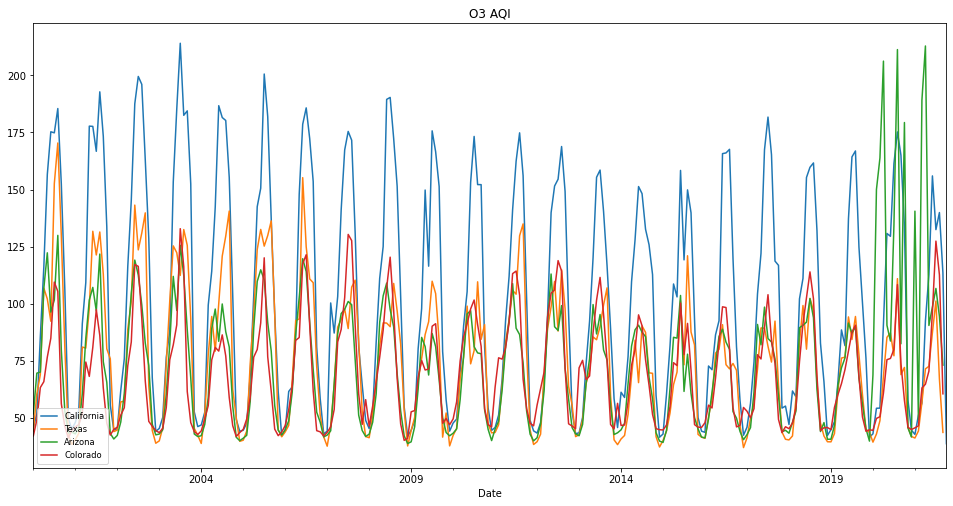

In [86]:
plt.figure(figsize=(36,18))

plt.subplot(221)
O3aqi = df_city_group['O3 AQI']
O3top = O3aqi.mean().nlargest(4).index
for i in range(len(O3top)):
    O3aqi.get_group(O3top[i]).groupby(pd.Grouper(level='Date',freq='M')).mean().plot()
plt.legend(O3top,loc=3,fontsize='small')
plt.title('O3 AQI')

In [76]:
O3top

Index(['Not in a city', 'Shaver Lake', 'Mineral King', 'Crestline'], dtype='object', name='City')

In [55]:
poll = pd.read_csv("pollution_us_2000_2016.csv")

In [56]:
poll = poll.drop(['Unnamed: 0','State Code','County Code','Site Num',
                  'Address','NO2 Units','O3 Units','SO2 Units','CO Units'],axis=1)
pollSt = poll[['State','Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]
pollSt = pollSt.dropna(axis='rows')  # Delete rows with NAs
pollSt = pollSt[pollSt.State!='Country Of Mexico']  # Delete Mexico
pollSt['Date Local'] = pd.to_datetime(pollSt['Date Local'],format='%Y-%m-%d')  # Change date from string to date value
pollSt = pollSt.groupby(['State','Date Local']).mean()  # Take mean values if there are depulicated entries
pollStGrouped = pollSt.groupby(level=0)

In [67]:
pollStGrouped

In [72]:
pollO3

Text(0.5, 1.0, 'O3 AQI')

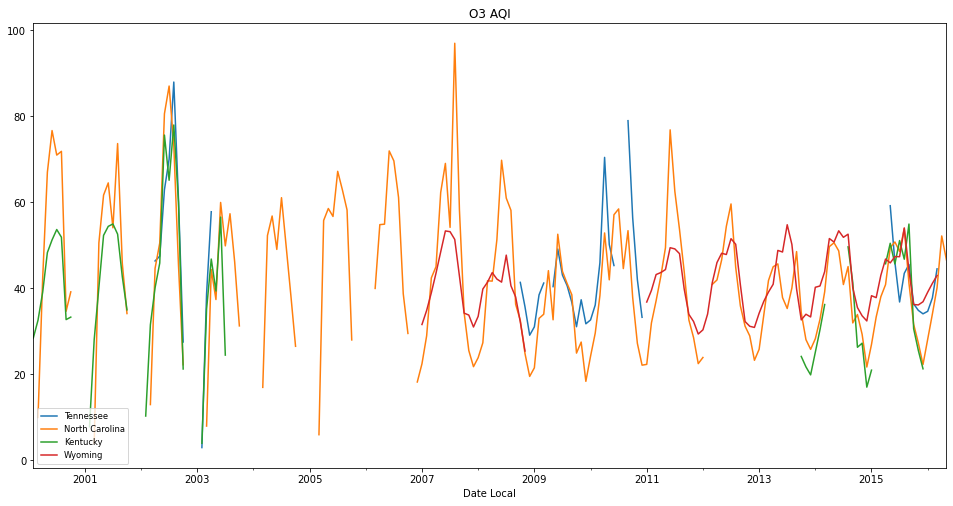

In [63]:
plt.figure(figsize=(36, 18))

# O3 AQI
plt.subplot(222)
pollO3 = pollStGrouped['O3 AQI']
pollO3Top = pollO3.mean().nlargest(4).index
for i in range(len(pollO3Top)):
    pollO3.get_group(pollO3Top[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(pollO3Top,loc=3,fontsize='small')
plt.title('O3 AQI')